In [2]:
%pip install seaborn


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----------------------- ---------------- 174.1/294.9 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\divya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\divya\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [5]:
import numpy as np
import pandas as pd
import string
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [8]:
train_data = pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\offensive_language_identification\olid-training-v1.0.tsv',delimiter='\t',encoding = 'utf-8' )

In [9]:
train_data.head()

,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         13240 non-null  int64 
 1   tweet      13240 non-null  object
 2   subtask_a  13240 non-null  object
 3   subtask_b  4400 non-null   object
 4   subtask_c  3876 non-null   object
dtypes: int64(1), object(4)
memory usage: 517.3+ KB


In [11]:
train_data.isnull()

,id,tweet,subtask_a,subtask_b,subtask_c
0,False,False,False,False,True
1,False,False,False,False,False
2,False,False,False,True,True
3,False,False,False,False,True
4,False,False,False,True,True
...,...,...,...,...,...
13235,False,False,False,False,False
13236,False,False,False,True,True
13237,False,False,False,False,False
13238,False,False,False,False,True


In [12]:
train_data.isnull().sum()

id              0
tweet           0
subtask_a       0
subtask_b    8840
subtask_c    9364
dtype: int64

changing name here 

In [13]:
train_tweets = train_data[['tweet']]
print(train_tweets)

                                                   tweet
0      @USER She should ask a few native Americans wh...
1      @USER @USER Go home you’re drunk!!! @USER #MAG...
2      Amazon is investigating Chinese employees who ...
3      @USER Someone should'veTaken" this piece of sh...
4      @USER @USER Obama wanted liberals &amp; illega...
...                                                  ...
13235  @USER Sometimes I get strong vibes from people...
13236  Benidorm ✅  Creamfields ✅  Maga ✅   Not too sh...
13237  @USER And why report this garbage.  We don't g...
13238                                        @USER Pussy
13239  #Spanishrevenge vs. #justice #HumanRights and ...

[13240 rows x 1 columns]


In [14]:
train_task_a_labels = train_data[['subtask_a']]
print(train_task_a_labels)

      subtask_a
0           OFF
1           OFF
2           NOT
3           OFF
4           NOT
...         ...
13235       OFF
13236       NOT
13237       OFF
13238       OFF
13239       NOT

[13240 rows x 1 columns]


In [15]:
train_task_b_labels = train_data[['subtask_b']]
print(train_task_b_labels)

      subtask_b
0           UNT
1           TIN
2           NaN
3           UNT
4           NaN
...         ...
13235       TIN
13236       NaN
13237       TIN
13238       UNT
13239       NaN

[13240 rows x 1 columns]


In [16]:
train_task_c_labels = train_data[['subtask_c']]

print(train_task_c_labels)

      subtask_c
0           NaN
1           IND
2           NaN
3           NaN
4           NaN
...         ...
13235       IND
13236       NaN
13237       OTH
13238       NaN
13239       NaN

[13240 rows x 1 columns]


In [17]:
train_task_a_labels.columns.values[0] = 'class_a'
train_task_b_labels.columns.values[0] = 'class_b'
train_task_c_labels.columns.values[0] = 'class_c'

In [19]:
print(train_task_a_labels)

      class_a
0         OFF
1         OFF
2         NOT
3         OFF
4         NOT
...       ...
13235     OFF
13236     NOT
13237     OFF
13238     OFF
13239     NOT

[13240 rows x 1 columns]


Since class a has no null values , it does not need data cleaning

In [104]:
train_data['tweet'][2]

'Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT'

Text preprocessing

In [20]:
def clean_tweets(df):
    
    punctuations = string.punctuation
    
    df.loc[:, 'tweet'] = df.tweet.str.replace('@USER', '')
    df.loc[:, 'tweet'] = df.tweet.str.replace('URL', '')
    df.loc[:, 'tweet'] = df.tweet.str.replace("&amp",'and')
    df.loc[:,'tweet'] = df.tweet.str.replace('&It','')
    df.loc[:,'tweet'] = df.tweet.str.replace('&gt','')
    df.loc[:, 'tweet'] = df.tweet.str.replace('\d','')
    df.loc[:, 'tweet'] = df.tweet.str.lower()
    
    for i in punctuations:
        df.loc[:,'tweet'] = df.tweet.str.replace(i,'')
        
    df.loc[: , 'tweet'] = df.astype(str).apply(
        lambda x: x.str.encode('ascii','ignore').str.decode('ascii')
    )
    
    df.loc[:,'tweet'] = df.tweet.str.strip()
    

In [21]:
clean_tweets(train_tweets)


In [22]:
train_tweets ['tweet'][2]

'amazon is investigating chinese employees who are selling internal data to thirdparty sellers looking for an edge in the competitive marketplace  amazon maga kag china tcot'

for only understanding the concept of punctuation replacing

In [23]:
punctuations = string.punctuation
# punctuations('Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT')
punctuations

txt = "'Amazon is investigating Chinese employees who are selling internal data to third-party sellers looking for an edge in the competitive marketplace. URL #Amazon #MAGA #KAG #CHINA #TCOT'"

for i in txt:
    if i in punctuations:
        txt = txt.replace(i, " ")

In [24]:
print(txt)

 Amazon is investigating Chinese employees who are selling internal data to third party sellers looking for an edge in the competitive marketplace  URL  Amazon  MAGA  KAG  CHINA  TCOT 


In [25]:
train_task_a_data = train_tweets.join(train_task_a_labels)

In [26]:
train_task_a_data

,tweet,class_a
0,she should ask a few native americans what the...,OFF
1,go home youre drunk maga trump2020,OFF
2,amazon is investigating chinese employees who ...,NOT
3,someone shouldvetaken this piece of shit to a ...,OFF
4,obama wanted liberals and illegals to move int...,NOT
...,...,...
13235,sometimes i get strong vibes from people and t...,OFF
13236,benidorm creamfields maga not too shabb...,NOT
13237,and why report this garbage we dont give a crap,OFF
13238,pussy,OFF


To apply quotes to cleaned tweets

In [27]:
#train_task_a_data.update(train_task_a_data[['tweet']]).applymap('\'{}\''.format)
formatted_tweets = train_task_a_data[['tweet']].applymap(lambda x: f"'{x}'")



C:\Users\divya\AppData\Local\Temp\ipykernel_8100\2727804921.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_tweets = train_task_a_data[['tweet']].applymap(lambda x: f"'{x}'")


In [28]:
formatted_tweets.head()

,tweet
0,'she should ask a few native americans what th...
1,'go home youre drunk maga trump2020'
2,'amazon is investigating chinese employees who...
3,'someone shouldvetaken this piece of shit to a...
4,'obama wanted liberals and illegals to move in...


Read tweets from test sets 

In [29]:
test_tweet_a = pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\offensive_language_identification\testset-levela.tsv', delimiter='\t', encoding = 'utf')

In [30]:
test_tweet_a.head()

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...


Read tweet's labels

In [32]:
test_label_a = pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\offensive_language_identification\labels-levela.csv')

In [33]:
test_label_a.head()

,15923,OFF
0,27014,NOT
1,30530,NOT
2,13876,NOT
3,60133,OFF
4,83681,OFF


#merge tweets with lables by id 

In [34]:
print(test_tweet_a.columns)
print(test_label_a.columns)


Index(['id', 'tweet'], dtype='object')
Index(['15923', 'OFF'], dtype='object')


Index(['id', 'tweet'], dtype='object')
Index(['15923', 'OFF'], dtype='object')

replace 15923 by id 

In [35]:
# Rename the column in test_label_a to 'id'
test_label_a = test_label_a.rename(columns={'15923': 'id'})

#

In [36]:
print("test_tweet_a columns:", test_tweet_a.columns)
print("test_label_a columns:", test_label_a.columns)


test_tweet_a columns: Index(['id', 'tweet'], dtype='object')
test_label_a columns: Index(['id', 'OFF'], dtype='object')


In [37]:
# Rename the built-in function 'id' to 'id' (as a string)
test_label_a = test_label_a.rename(columns={id: 'id'})  # This corrects the column name

# Print columns to verify the change
print("test_label_a columns after renaming:", test_label_a.columns)


test_label_a columns after renaming: Index(['id', 'OFF'], dtype='object')


In [38]:
test_tweet_a

,id,tweet
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...
1,27014,"#ConstitutionDay is revered by Conservatives, ..."
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...
3,13876,#Watching #Boomer getting the news that she is...
4,60133,#NoPasaran: Unity demo to oppose the far-right...
...,...,...
855,73439,#DespicableDems lie again about rifles. Dem Di...
856,25657,#MeetTheSpeakers 🙌 @USER will present in our e...
857,67018,3 people just unfollowed me for talking about ...
858,50665,#WednesdayWisdom Antifa calls the right fascis...


In [39]:
test_tweet_a = test_tweet_a.rename(columns={'OFF' : 'class_a'})

In [40]:
test_tweet_a = test_tweet_a.merge(test_label_a, on='id')

In [41]:
test_tweet_a

,id,tweet,OFF
0,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT
1,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
2,13876,#Watching #Boomer getting the news that she is...,NOT
3,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF
4,83681,. . . What the fuck did he do this time?,OFF
...,...,...,...
854,73439,#DespicableDems lie again about rifles. Dem Di...,OFF
855,25657,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
856,67018,3 people just unfollowed me for talking about ...,OFF
857,50665,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [42]:
test_tweet_a.drop(columns = 'id')

,tweet,OFF
0,"#ConstitutionDay is revered by Conservatives, ...",NOT
1,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT
2,#Watching #Boomer getting the news that she is...,NOT
3,#NoPasaran: Unity demo to oppose the far-right...,OFF
4,. . . What the fuck did he do this time?,OFF
...,...,...
854,#DespicableDems lie again about rifles. Dem Di...,OFF
855,#MeetTheSpeakers 🙌 @USER will present in our e...,NOT
856,3 people just unfollowed me for talking about ...,OFF
857,#WednesdayWisdom Antifa calls the right fascis...,NOT


In [43]:
clean_tweets(test_tweet_a)

In [44]:
test_tweet_a

,id,tweet,OFF
0,27014,constitutionday is revered by conservatives ha...,NOT
1,30530,foxnews nra maga potus trump 2ndamendment rnc ...,NOT
2,13876,watching boomer getting the news that she is s...,NOT
3,60133,nopasaran unity demo to oppose the farright in...,OFF
4,83681,what the fuck did he do this time,OFF
...,...,...,...
854,73439,despicabledems lie again about rifles dem dist...,OFF
855,25657,meetthespeakers will present in our event oi...,NOT
856,67018,3 people just unfollowed me for talking about ...,OFF
857,50665,wednesdaywisdom antifa calls the right fascist...,NOT


#Apply quotes to cleaned tweets

In [45]:
test_tweet_a.update(test_tweet_a[['tweet']].applymap('\'{}\''.format))

C:\Users\divya\AppData\Local\Temp\ipykernel_8100\3937465466.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  test_tweet_a.update(test_tweet_a[['tweet']].applymap('\'{}\''.format))


In [46]:
test_tweet_a

,id,tweet,OFF
0,27014,'constitutionday is revered by conservatives h...,NOT
1,30530,'foxnews nra maga potus trump 2ndamendment rnc...,NOT
2,13876,'watching boomer getting the news that she is ...,NOT
3,60133,'nopasaran unity demo to oppose the farright i...,OFF
4,83681,'what the fuck did he do this time',OFF
...,...,...,...
854,73439,'despicabledems lie again about rifles dem dis...,OFF
855,25657,'meetthespeakers will present in our event o...,NOT
856,67018,'3 people just unfollowed me for talking about...,OFF
857,50665,'wednesdaywisdom antifa calls the right fascis...,NOT


In [47]:
test_tweet_a = test_tweet_a.drop(columns = 'id')

In [48]:
test_tweet_a.head()

,tweet,OFF
0,'constitutionday is revered by conservatives h...,NOT
1,'foxnews nra maga potus trump 2ndamendment rnc...,NOT
2,'watching boomer getting the news that she is ...,NOT
3,'nopasaran unity demo to oppose the farright i...,OFF
4,'what the fuck did he do this time',OFF


In [49]:
import seaborn as sns

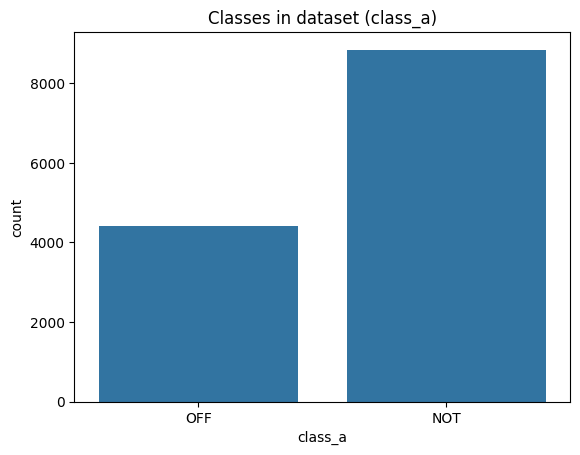

In [50]:
# def count_classes(df,task):
#     sns.countplot(df[task])
#     plt.title('Classes in dataset (class_a)')
    
# count_classes(train_task_a_data,"class_a")

#The error arises because seaborn.countplot() is trying to convert your categorical data (like 'OFF') into floats, which it can't do directly. This issue happens when the dataset contains non-numeric (categorical) values and you're trying to visualize them inappropriately.

import seaborn as sns
import matplotlib.pyplot as plt

def count_classes(df, task):
    sns.countplot(x=df[task])  # Ensure that countplot is plotting on 'x'
    plt.title(f'Classes in dataset ({task})')  # Dynamically show the column name in the title
    plt.show()  # Display the plot

# Example usage
count_classes(train_task_a_data, "class_a")


In [51]:
print(test_tweet_a.columns)


Index(['tweet', 'OFF'], dtype='object')


In [52]:
test_tweet_a = test_tweet_a.rename(columns={'OFF': 'class_a'})


In [53]:
print(test_tweet_a)


                                                 tweet class_a
0    'constitutionday is revered by conservatives h...     NOT
1    'foxnews nra maga potus trump 2ndamendment rnc...     NOT
2    'watching boomer getting the news that she is ...     NOT
3    'nopasaran unity demo to oppose the farright i...     OFF
4                  'what the fuck did he do this time'     OFF
..                                                 ...     ...
854  'despicabledems lie again about rifles dem dis...     OFF
855  'meetthespeakers   will present in our event o...     NOT
856  '3 people just unfollowed me for talking about...     OFF
857  'wednesdaywisdom antifa calls the right fascis...     NOT
858            'kavanaugh typical liberals  democrats'     NOT

[859 rows x 2 columns]


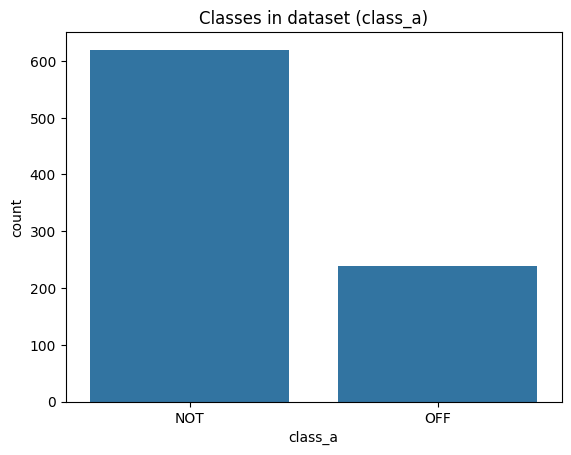

In [54]:

# Example usage
count_classes(test_tweet_a, "class_a")

Application of Bidirectional LSTM

TASK A

"OFF" -> 1
"NOT" -> 0

this is how label_Encoder is working 

creates a new column "class_a_code" in the DataFrame train_task_a_data that stores the numerical representation of the "class_a" labels.

fit_transform(): The fit_transform() method does two things:

fit: It learns (or "fits") the mapping from the categorical labels (strings) to integers. It identifies all the unique labels in the column and assigns them numerical codes.
transform: Once it has learned the mapping, it transforms the categorical labels in the column into the corresponding integer codes.

In [55]:
# creating labelEncoder 

encoder = LabelEncoder()


encoder.fit(train_task_a_data["class_a"])

# Converting string labels into numbers

train_task_a_data["class_a_code"] = encoder.transform(train_task_a_data["class_a"])
test_tweet_a["class_a_code"] = encoder.transform(test_tweet_a["class_a"])

In [56]:
train_task_a_data

,tweet,class_a,class_a_code
0,she should ask a few native americans what the...,OFF,1
1,go home youre drunk maga trump2020,OFF,1
2,amazon is investigating chinese employees who ...,NOT,0
3,someone shouldvetaken this piece of shit to a ...,OFF,1
4,obama wanted liberals and illegals to move int...,NOT,0
...,...,...,...
13235,sometimes i get strong vibes from people and t...,OFF,1
13236,benidorm creamfields maga not too shabb...,NOT,0
13237,and why report this garbage we dont give a crap,OFF,1
13238,pussy,OFF,1


In [57]:
test_tweet_a

,tweet,class_a,class_a_code
0,'constitutionday is revered by conservatives h...,NOT,0
1,'foxnews nra maga potus trump 2ndamendment rnc...,NOT,0
2,'watching boomer getting the news that she is ...,NOT,0
3,'nopasaran unity demo to oppose the farright i...,OFF,1
4,'what the fuck did he do this time',OFF,1
...,...,...,...
854,'despicabledems lie again about rifles dem dis...,OFF,1
855,'meetthespeakers will present in our event o...,NOT,0
856,'3 people just unfollowed me for talking about...,OFF,1
857,'wednesdaywisdom antifa calls the right fascis...,NOT,0


In [58]:
# creating a tuple of for and class code 


train_task_a_data['class-tuple'] = train_task_a_data[['class_a','class_a_code']].apply(tuple, axis=1)
class_a = train_task_a_data['class-tuple'].unique()
class_a

array([('OFF', 1), ('NOT', 0)], dtype=object)

In [59]:
#label the Data

train_tweets = train_task_a_data['tweet']
train_labels = train_task_a_data['class_a_code']

X_test = test_tweet_a['tweet']
y_test = test_tweet_a['class_a_code']

In [60]:
X_train, X_val, y_train, y_val = train_test_split(train_tweets,train_labels,test_size= 0.30,random_state=42)

In [61]:
train_tweets

0        she should ask a few native americans what the...
1                      go home youre drunk  maga trump2020
2        amazon is investigating chinese employees who ...
3        someone shouldvetaken this piece of shit to a ...
4        obama wanted liberals and illegals to move int...
                               ...                        
13235    sometimes i get strong vibes from people and t...
13236    benidorm   creamfields   maga    not too shabb...
13237     and why report this garbage  we dont give a crap
13238                                                pussy
13239    spanishrevenge vs justice humanrights and free...
Name: tweet, Length: 13240, dtype: object

Tokenization helps in building a vocabulary that maps words to unique integers. This vocabulary is essential for models to understand and work with text.

Vocabulary Example: {'the': 1, 'cat': 2, 'sat': 3, 'on': 4, 'mat': 5}

Tokenization helps handle words that are not present in the training vocabulary by assigning them a special token (</OOV>)

In your code, word_index refers to the dictionary created by the tokenizer that maps each unique word in your training data to a unique integer. This mapping is crucial because machine learning models cannot work with raw text; they require numeric input.

{
  'the': 1,
  'cat': 2,
  'sat': 3,
  'on': 4,
  'mat': 5
}


In [62]:
max_features = 10000
embedding_dim = 128
max_len =500

tokenizer = Tokenizer(num_words=max_features, oov_token = '</OOV>')

tokenizer.fit_on_texts(X_train.values)

word_index = tokenizer.word_index
print(f"Vocabulary size: {len(word_index)}")

Vocabulary size: 16760


In [63]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [64]:
X_train_seq = tokenizer.texts_to_sequences(X_train.values)

X_train_pad = pad_sequences(X_train_seq, maxlen = max_len)

print("train data tensor", X_train_pad.shape)

train data tensor (9268, 500)


In [65]:
X_val_seq = tokenizer.texts_to_sequences(X_val.values)

X_val_pad = pad_sequences(X_val_seq, maxlen = max_len)

print("test data tensor", X_val_pad.shape)

test data tensor (3972, 500)


In [66]:
X_test_seq = tokenizer.texts_to_sequences(X_test.values)

X_test_pad = pad_sequences(X_test_seq, max_len)

print("test data tensor", X_test_pad.shape)

test data tensor (859, 500)


In [67]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional


In [68]:
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=embedding_dim, input_length=max_len))

# Add other layers
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid')) 

C:\Users\divya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [69]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
max_features = 10000
embedding_dim = 128
max_len =500

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add the embedding layer with the correct input_length
model.add(Embedding(input_dim= 10000, output_dim= 128, input_length= 500))

# Add the Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))

# Add a Dense layer
model.add(Dense(64, activation='relu'))

# Add Dropout for regularization
model.add(Dropout(0.5))

# Add the final Dense layer (adjust activation function as needed)
model.add(Dense(1, activation='sigmoid'))  # Change to 'softmax' and number of units if it's a multi-class problem

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Define the model
model = Sequential()

# Add the embedding layer with the correct input_length
model.add(Embedding(input_dim=10000, output_dim=128, input_length=500))

# Add the Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64)))

# Add a Dense layer
model.add(Dense(64, activation='relu'))

# Add Dropout for regularization
model.add(Dropout(0.5))

# Add the final Dense layer
model.add(Dense(1, activation='sigmoid'))  # Change to 'softmax' and number of units if it's a multi-class problem

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)